# Introduction to machine learning


This notebook makes a brief approach to classification and regression problems.

## Classification 

In [176]:
%pylab inline 
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# load data and make some visualizations to explore data
data = np.loadtxt('fake_classification.txt')
inf = data[:,0:2]
cla = data[:,2]

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


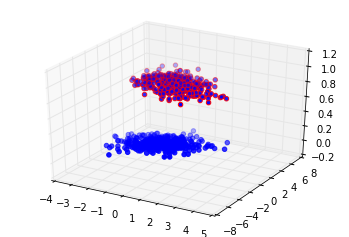

In [177]:
# 3D plot with class in the z axis
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(inf[:,0][cla==1],inf[:,1][cla==1],cla[cla==1],color ='r')
ax.scatter(inf[:,0][cla==0],inf[:,1][cla==0],cla[cla==0],color ='b')

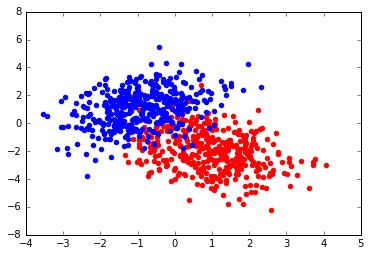

In [178]:
# 2D scatter 
plt.scatter(inf[:,0][cla==1],inf[:,1][cla==1], color ='r')
plt.scatter(inf[:,0][cla==0],inf[:,1][cla==0], color ='b') 

In [179]:
# Set the training set

N,m = data.shape
percent_train = 0.75
N_train = int(percent_train*N)
N_part = int((1-percent_train)*N)
inf_train = inf[:N_train]
cla_train = cla[:N_train]
cla_train.shape

(600,)

In [180]:
# Set the test set 

inf_test = inf[N_train:]
cla_test = cla[N_train:]
cla_test.shape
type(inf_train)


numpy.ndarray

In [262]:
# First model -- k nearest neighbors

def find_k_nearest(p0,p,z,k):
    dist2 =sum((np.tile(p0,[len(p),1])-p)**2,1)
    return z[dist2.argsort()[:k]]

def k_nearest(group,train,test,k):
    z_pred = np.zeros(len(test[:,0]))
    for i in range(test_part):
        if (count_nonzero(find_k_nearest(test[i,:],train,group,k)) >= k/2):
            z_pred[i] = 1
    return z_pred

In [266]:
cla_pred = k_nearest(cla_train,inf_train,inf_test,k=20)
cla_pred

array([ 0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,
        1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,
        1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
        1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,
        1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,
        0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0

Test set - Observed


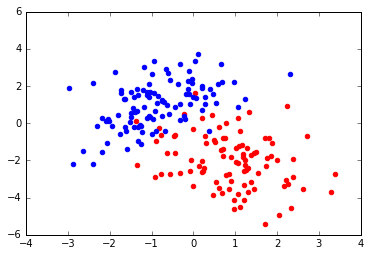

In [267]:
# 2D scatter 
plt.scatter(inf_test[:,0][cla_test==1],inf_test[:,1][cla_test==1], color ='r')
plt.scatter(inf_test[:,0][cla_test==0],inf_test[:,1][cla_test==0], color ='b')

print('Test set - Observed')

Test set - Observed


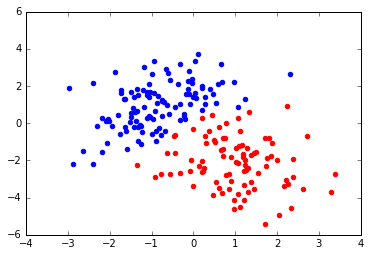

In [269]:
# 2D scatter 
plt.scatter(inf_test[:,0][cla_pred==1],inf_test[:,1][cla_pred==1], color ='r')
plt.scatter(inf_test[:,0][cla_pred==0],inf_test[:,1][cla_pred==0], color ='b')

print('Test set - Observed')

In [275]:
def k_nearest_error(pred,test):
    correct = np.zeros(len(pred))
    correct[pred==test] = 1
    return (1 - sum(correct)/len(cla_pred))*100

In [277]:
k_nearest_error(cla_pred,cla_test)

3.5000000000000031

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future


1.0

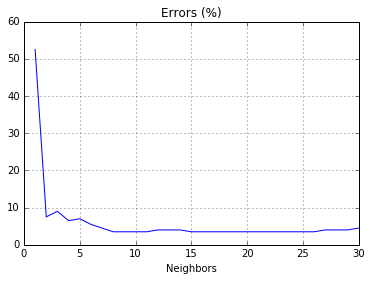

In [293]:
neighbors = linspace(1,30,30)
error =np.zeros((30)) 
for i in range(30):
    error[i] = k_nearest_error(k_nearest(cla_train,inf_train,inf_test,i),cla_test)
plt.plot(neighbors,error)
plt.grid()
plt.xlabel('Neighbors')
plt.title('Errors (%)')
neighbors[find == min(error)]

In [295]:
error.T

array([ 52.5,   7.5,   9. ,   6.5,   7. ,   5.5,   4.5,   3.5,   3.5,
         3.5,   3.5,   4. ,   4. ,   4. ,   3.5,   3.5,   3.5,   3.5,
         3.5,   3.5,   3.5,   3.5,   3.5,   3.5,   3.5,   3.5,   4. ,
         4. ,   4. ,   4.5])

In [ ]:
# Second model -- logi